In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
os.chdir("D:/Training/Academy/ML(Python)/Datasets")

In [9]:
milk = pd.read_csv("milk.csv", index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(milk_scaled)
pca_data.var()

pca0    4.040412
pca1    0.924372
pca2    0.134291
pca3    0.102689
pca4    0.006570
dtype: float64

In [10]:
prcomp.explained_variance_

array([4.0404117 , 0.92437238, 0.13429088, 0.1026886 , 0.00656977])

Percentage of Variation Explained:

In [11]:
( prcomp.explained_variance_ / np.sum(prcomp.explained_variance_)) * 100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [12]:
# or
prcomp.explained_variance_ratio_ * 100

array([77.57590469, 17.74794969,  2.57838496,  1.97162103,  0.12613963])

In [14]:
np.cumsum( prcomp.explained_variance_ratio_ * 100 )

array([ 77.57590469,  95.32385438,  97.90223934,  99.87386037,
       100.        ])

In [13]:
pca_data.iloc[:,:2]

,pca0,pca1
Animal,,
HORSE,2.435175,-0.231478
ORANGUTAN,2.258736,-0.693148
MONKEY,2.335861,-0.663328
DONKEY,2.318677,-0.273815
HIPPO,2.060294,-1.019199
CAMEL,1.301536,0.137303
BISON,1.282742,0.622667
BUFFALO,0.505068,0.088235
GUINEA PIG,-0.255502,0.287373


### Biplot

In [15]:
from pca import pca
import matplotlib.pyplot as plt

[11-12-2025 15:59:15] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 5 columns of the input data.
[11-12-2025 15:59:15] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 15:59:15] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 15:59:15] [pca.pca] [INFO] Compute explained variance.
[11-12-2025 15:59:15] [pca.pca] [INFO] The top 2 principal component(s) explains >= 95.00% of the explained variance.
[11-12-2025 15:59:15] [pca.pca] [INFO] The PCA reduction is performed on 5 variables (columns) of the input dataframe.
[11-12-2025 15:59:15] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 15:59:15] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 15:59:15] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[11-12-2025 15:59:15] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[11-12-2025 15:59:15] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[11

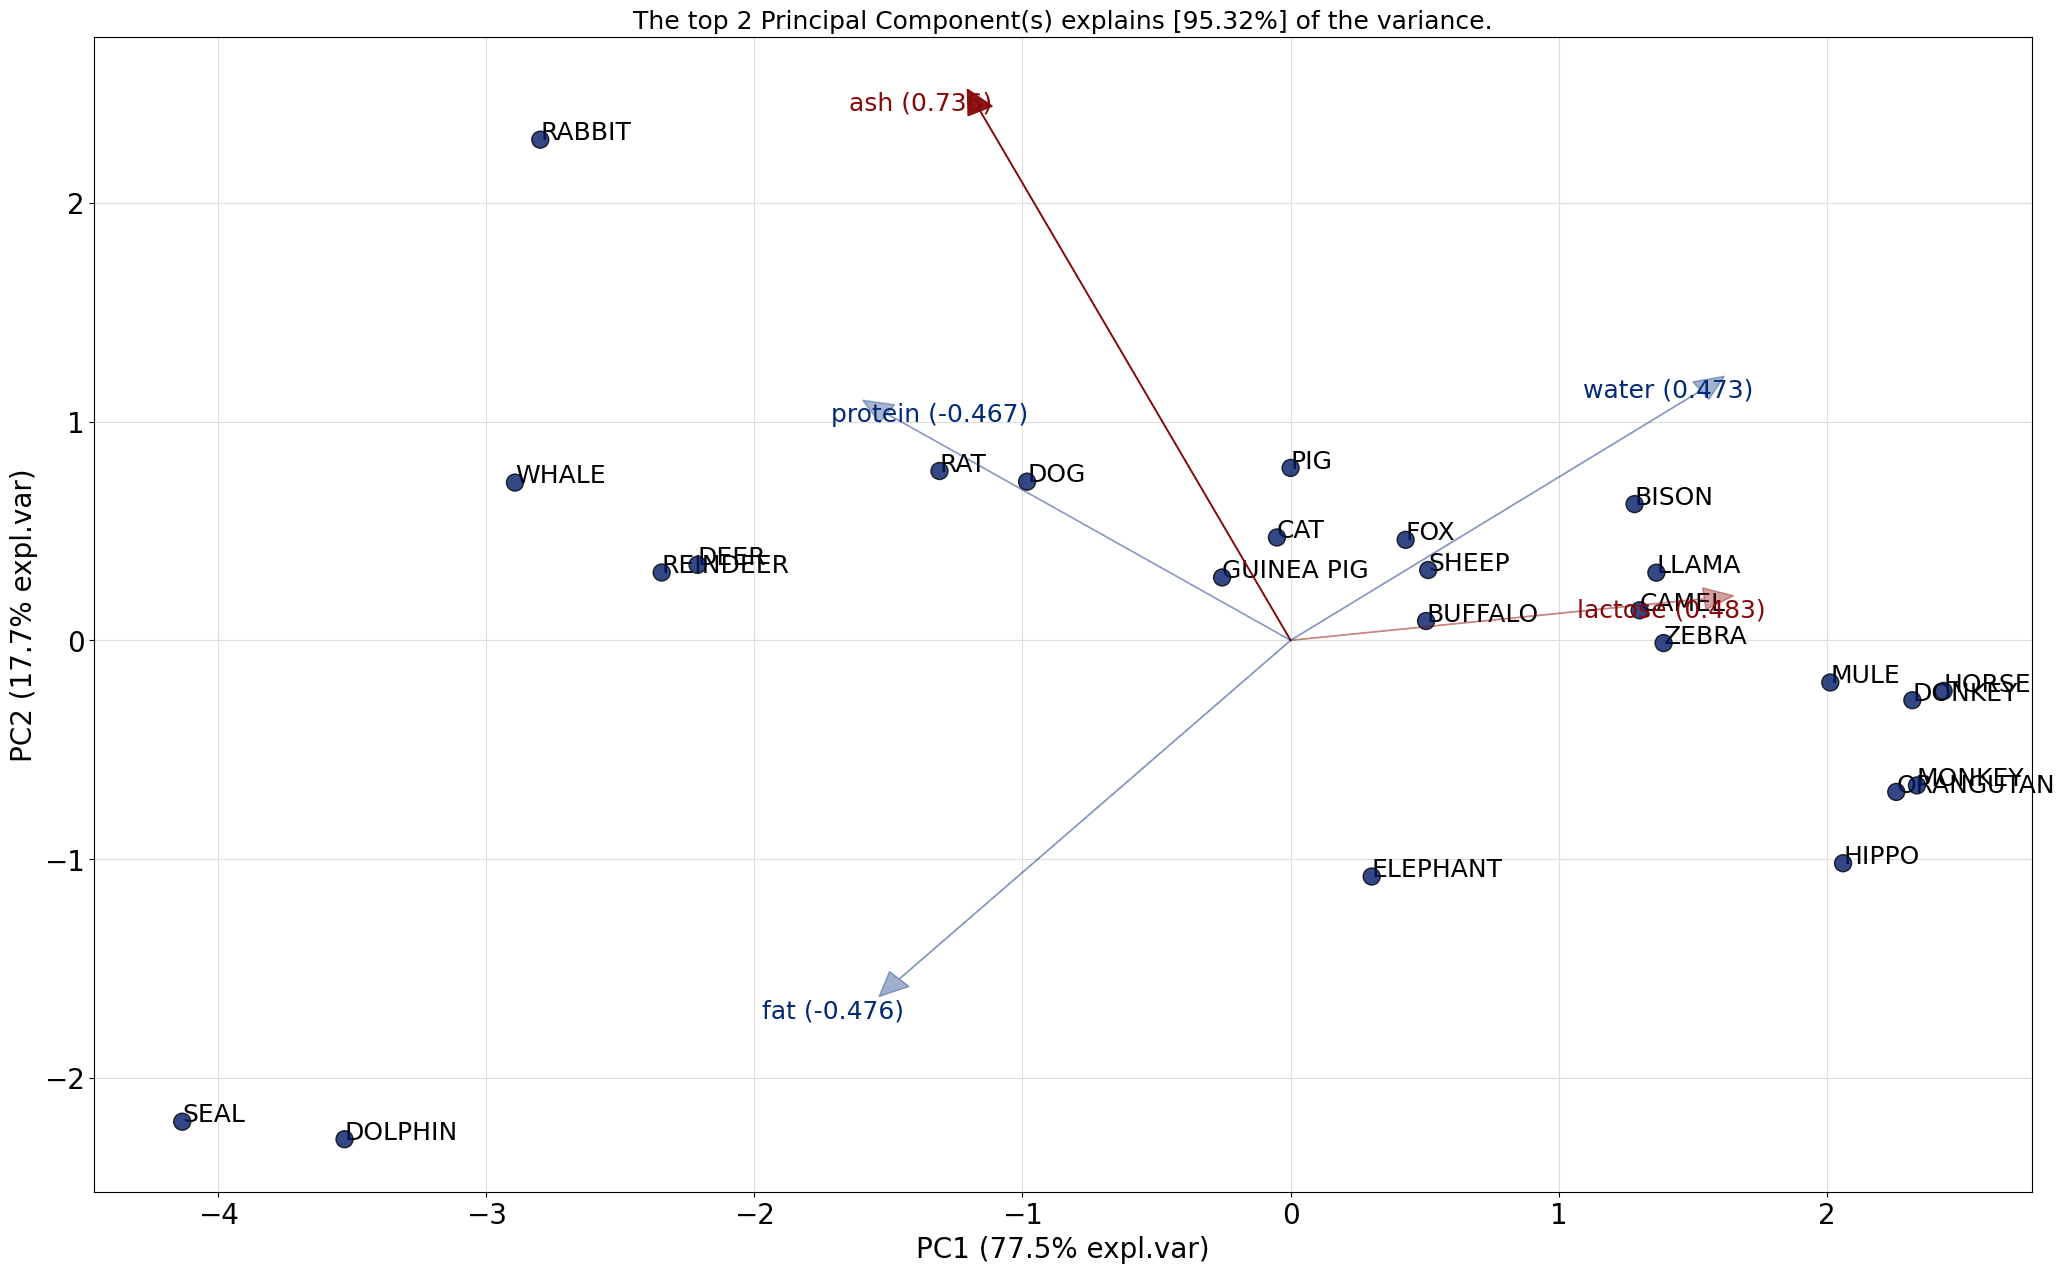

In [18]:
model = pca()
results = model.fit_transform(milk_scaled,col_labels=milk.columns, row_labels=list(milk.index))
model.biplot(label=True,legend=True)
for i in np.arange(0, milk.shape[0] ):
    plt.text(pca_data.values[i,0], pca_data.values[i,1],  list(milk.index)[i])
plt.show()

#### US Arrests

In [21]:
arrests = pd.read_csv("USArrests.csv", index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
arrests_scaled = scaler.fit_transform(arrests)
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(arrests_scaled)
np.cumsum( prcomp.explained_variance_ratio_*100 )

array([ 62.00603948,  86.75016829,  95.66424781, 100.        ])

[11-12-2025 16:25:08] [pca.pca] [INFO] PCA reduction performed to capture at least 95.0% explained variance using 4 columns of the input data.
[11-12-2025 16:25:08] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 16:25:08] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 16:25:08] [pca.pca] [INFO] Compute explained variance.
[11-12-2025 16:25:08] [pca.pca] [INFO] The top 3 principal component(s) explains >= 95.00% of the explained variance.
[11-12-2025 16:25:08] [pca.pca] [INFO] The PCA reduction is performed on 4 variables (columns) of the input dataframe.
[11-12-2025 16:25:08] [pca.pca] [INFO] Fit using PCA.
[11-12-2025 16:25:08] [pca.pca] [INFO] Compute loadings and PCs.
[11-12-2025 16:25:08] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[11-12-2025 16:25:08] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[11-12-2025 16:25:08] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[11

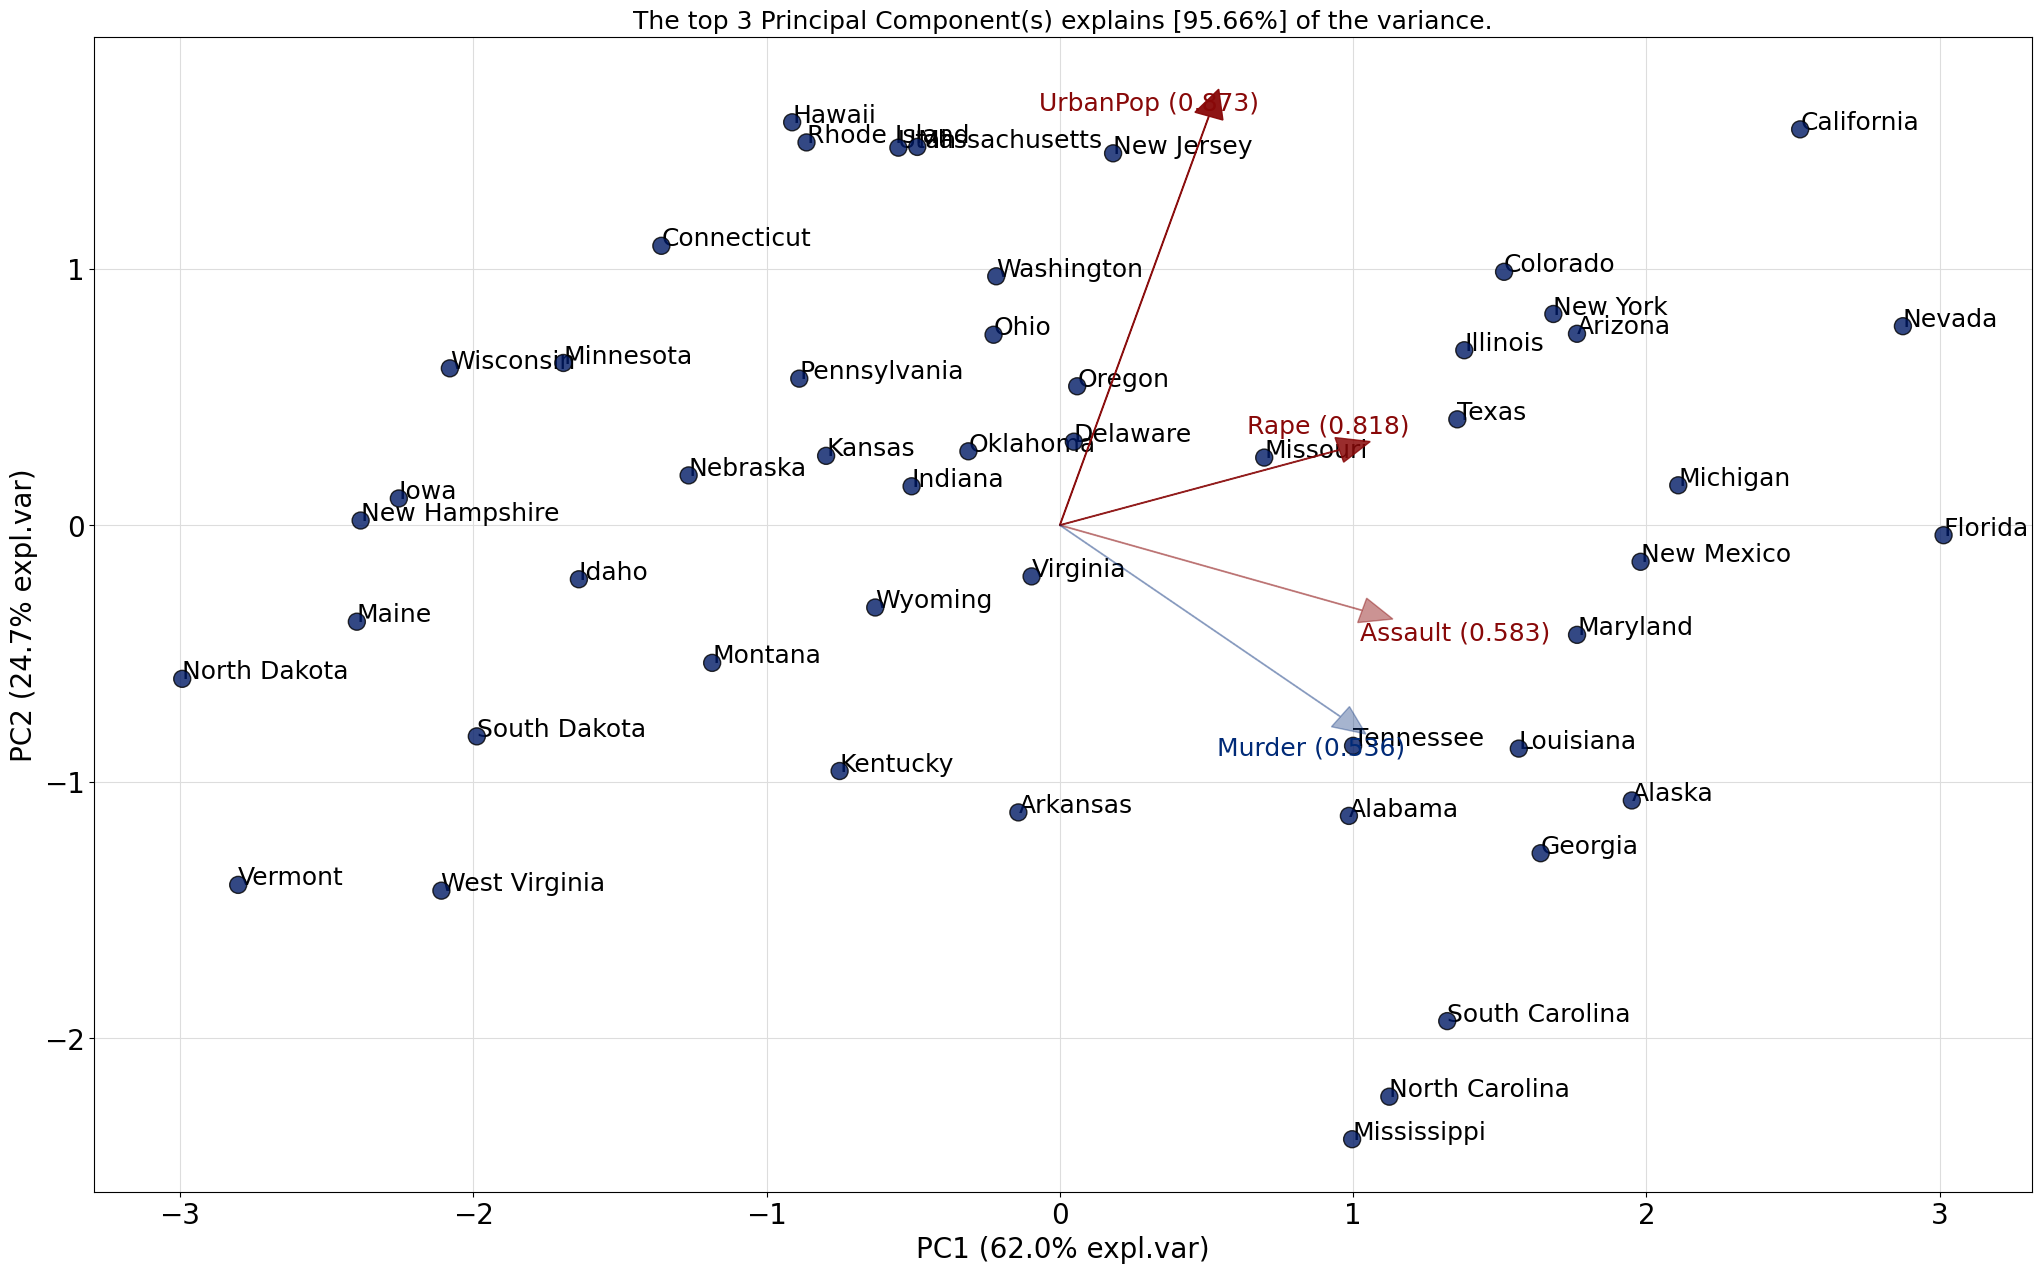

In [22]:
model = pca()
results = model.fit_transform(arrests_scaled,col_labels=arrests.columns, row_labels=list(arrests.index))
model.biplot(label=True,legend=True)
for i in np.arange(0, arrests.shape[0] ):
    plt.text(pca_data.values[i,0], pca_data.values[i,1],  list(arrests.index)[i])
plt.show()